# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm 

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
athletes.head(5)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
# Sua análise começa aqui.
a = get_sample(athletes, "height", 3000)
abs(sct.shapiro(a)[1])<0.05

True

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [7]:
def q1():
    # Retorne aqui o resultado da questão 1.
    a = get_sample(athletes, "height", 3000)
    return abs(sct.shapiro(a)[1])>0.05
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

(array([  1.,   2.,   2.,   2.,   6.,  18.,  29.,  90., 141., 199., 310.,
        303., 346., 301., 347., 258., 197., 187.,  92.,  76.,  39.,  36.,
         14.,   2.,   2.]),
 array([1.33  , 1.3628, 1.3956, 1.4284, 1.4612, 1.494 , 1.5268, 1.5596,
        1.5924, 1.6252, 1.658 , 1.6908, 1.7236, 1.7564, 1.7892, 1.822 ,
        1.8548, 1.8876, 1.9204, 1.9532, 1.986 , 2.0188, 2.0516, 2.0844,
        2.1172, 2.15  ]),
 <a list of 25 Patch objects>)

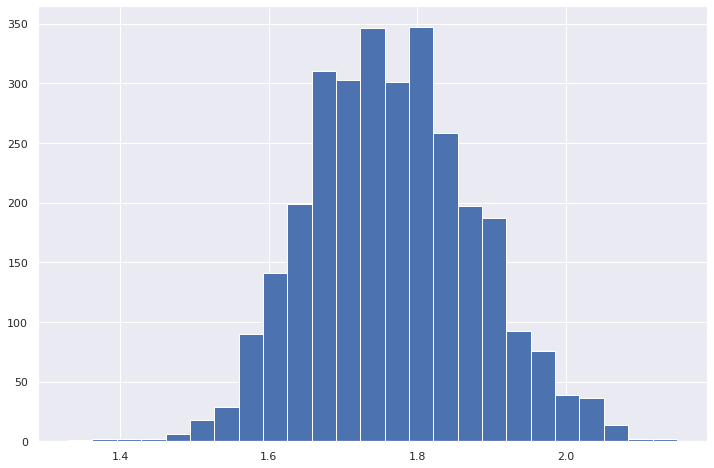

In [8]:
plt.hist(a,bins=25)

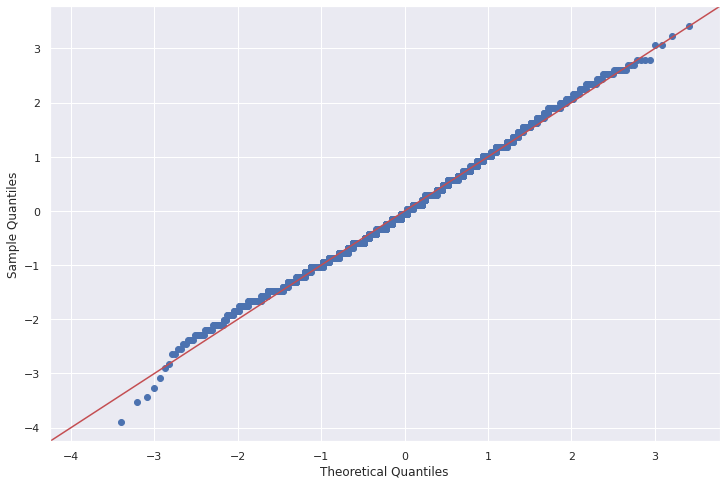

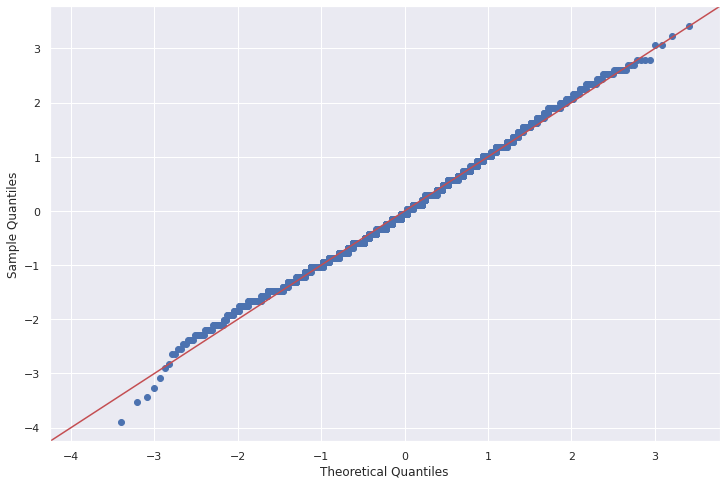

In [9]:
sm.qqplot(a, fit=True, line ='45') 

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [10]:
sct.jarque_bera(a)

(13.03363513594265, 0.001478366424594868)

In [11]:
def q2():
    a = get_sample(athletes, "height", 3000)
    return bool(abs(sct.jarque_bera(a)[1])>0.05)
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [12]:
b = get_sample(athletes, "weight", 3000)
abs(sct.normaltest(b)[1])<0.05

True

In [13]:
def q3():
    b = get_sample(athletes, "weight", 3000)
    return bool(abs(sct.normaltest(b)[1])>0.05)
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

(array([  6.,  42., 138., 293., 345., 430., 376., 376., 260., 214., 157.,
        134.,  85.,  48.,  24.,  19.,  19.,   9.,  12.,   2.,   4.,   3.,
          0.,   1.,   3.]),
 array([ 37.  ,  41.92,  46.84,  51.76,  56.68,  61.6 ,  66.52,  71.44,
         76.36,  81.28,  86.2 ,  91.12,  96.04, 100.96, 105.88, 110.8 ,
        115.72, 120.64, 125.56, 130.48, 135.4 , 140.32, 145.24, 150.16,
        155.08, 160.  ]),
 <a list of 25 Patch objects>)

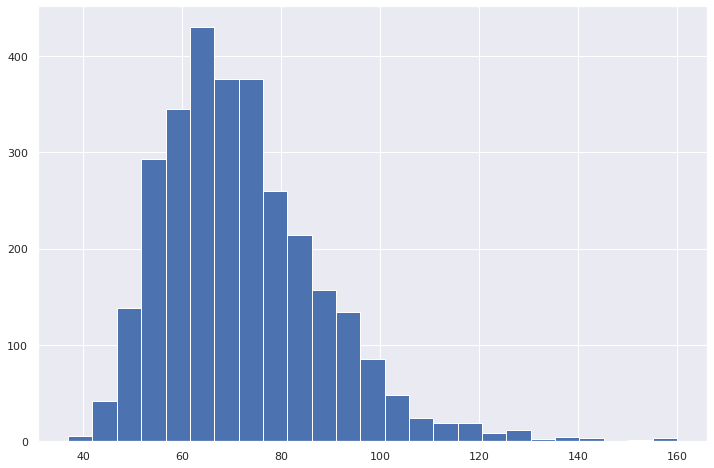

In [14]:
plt.hist(b,bins=25)

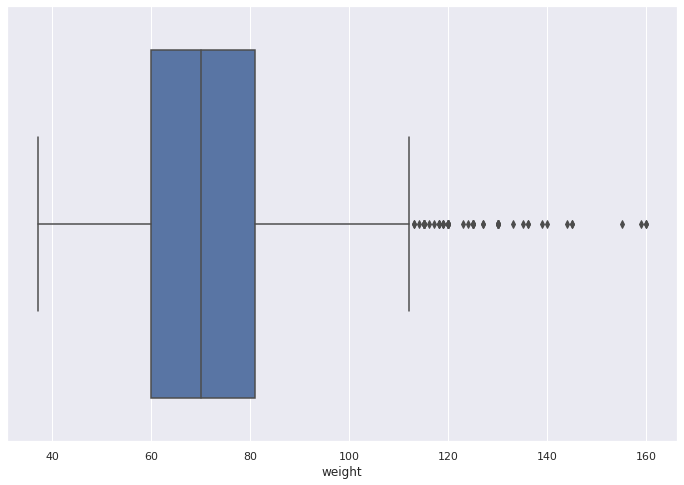

In [15]:
ax = sns.boxplot(b)

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [16]:
b_log = np.log(b)
abs(sct.normaltest(b_log)[1])<0.05

True

In [17]:
def q4():
    b_log = np.log(b)
    return bool(abs(sct.normaltest(b_log)[1])>0.05)
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

(array([  3.,   3.,  18.,  24.,  64., 133., 181., 243., 239., 346., 339.,
        256., 303., 249., 159., 157., 139.,  54.,  22.,  23.,  20.,  13.,
          5.,   3.,   4.]),
 array([3.61091791, 3.66948815, 3.72805838, 3.78662862, 3.84519886,
        3.90376909, 3.96233933, 4.02090957, 4.0794798 , 4.13805004,
        4.19662027, 4.25519051, 4.31376075, 4.37233098, 4.43090122,
        4.48947145, 4.54804169, 4.60661193, 4.66518216, 4.7237524 ,
        4.78232263, 4.84089287, 4.89946311, 4.95803334, 5.01660358,
        5.07517382]),
 <a list of 25 Patch objects>)

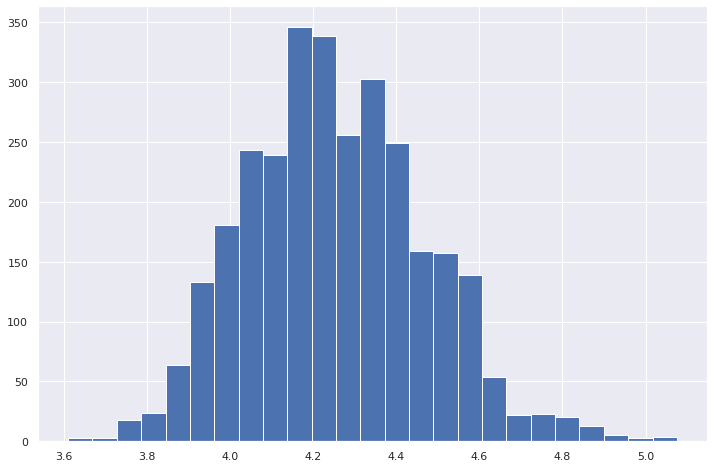

In [18]:
plt.hist(b_log,bins=25)

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [19]:
athletes[athletes.nationality.isin(["BRA","USA","CAN"])]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
13,376068084,Abbey D'Agostino,USA,female,5/25/92,1.61,49.0,athletics,0,0,0
14,162792594,Abbey Weitzeil,USA,female,12/3/96,1.78,68.0,aquatics,1,1,0
64,884912136,Abigail Johnston,USA,female,11/16/89,1.66,61.0,aquatics,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11404,409923311,Yuri van der Heijden,BRA,male,7/20/90,1.78,76.0,hockey,0,0,0
11436,306067063,Zach Garrett,USA,male,4/8/95,1.78,63.0,archery,0,1,0
11437,995684067,Zach Ziemek,USA,male,2/23/93,1.94,88.0,athletics,0,0,0
11439,99932834,Zack Test,USA,male,10/13/89,1.91,92.0,rugby sevens,0,0,0


In [20]:
def q5():
    bra = athletes[athletes.nationality == "BRA"]["height"]
    usa = athletes[athletes.nationality == "USA" ]["height"]
    p = sct.ttest_ind(bra,usa,equal_var=False,nan_policy="omit")[1]
    return bool(abs(p)>0.1)
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [21]:
def q6():
    bra = athletes[athletes.nationality == "BRA"]["height"]
    can = athletes[athletes.nationality == "CAN" ]["height"]
    p = sct.ttest_ind(bra,can,equal_var=False,nan_policy="omit")[1]
    return bool(abs(p)>0.1)
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [22]:
def q7():
    usa = athletes[athletes.nationality == "USA"]["height"]
    can = athletes[athletes.nationality == "CAN" ]["height"]
    p = sct.ttest_ind(usa,can,equal_var=False,nan_policy="omit")[1]
    return float(round(p,8))
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?